In [20]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
# Read training and test data files
train = pd.read_csv("fashion-mnist_train.csv").values
test  = pd.read_csv("fashion-mnist_test.csv").values

In [23]:
# Reshape and normalize training data
trainX = train[:, 1:].reshape(train.shape[0],1,28, 28).astype( 'float32' )
X_train = trainX / 255.0

y_train = train[:,0]


# Reshape and normalize test data
testX = test[:,1:].reshape(test.shape[0],1, 28, 28).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:,0]

In [25]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345,
)

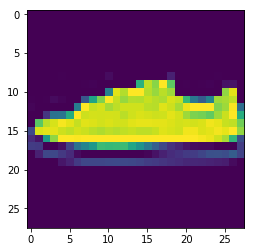

In [26]:
# lets see what the images look like

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [4]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [5]:
model = Sequential()
K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(10, activation= 'softmax' ))
  # Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


In [6]:
model.fit(X_train, y_train,
          epochs=20,
          batch_size= 160)
score = model.evaluate(X_test, y_test, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.7193 - acc: 0.7339
Epoch 2/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.4484 - acc: 0.8362
Epoch 3/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.3848 - acc: 0.8601
Epoch 4/20
60000/60000 [==============================] - 35s 590us/step - loss: 0.3489 - acc: 0.8735
Epoch 5/20
60000/60000 [==============================] - 36s 600us/step - loss: 0.3250 - acc: 0.8803
Epoch 6/20
60000/60000 [==============================] - 36s 598us/step - loss: 0.3103 - acc: 0.8864
Epoch 7/20
60000/60000 [==============================] - 36s 599us/step - loss: 0.2956 - acc: 0.8914
Epoch 8/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.2854 - acc: 0.8946
Epoch 9/20
60000/60000 [==============================] - 36s 607us/step - loss: 0.2784 - acc: 0.8967
Epoch 10/20
60000/60000 [=========

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________